In [1]:
import pyedflib
import numpy as np
import pandas as pd
import commands
import pywt
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
from pywt import WaveletPacket
import pywt.data
from detect_peaks import detect_peaks
%matplotlib notebook

### RMS

In [13]:
def rms(a, window_size):
    def subrms(a, window_size):
        a2 = np.power(a,2)
        window = np.ones(window_size)/float(window_size)
        return np.sqrt(np.convolve(a2, window, 'valid'))

    for i in range(a.shape[1]):
        if i == 0:
            Xc = subrms(a[:, i], window_size)
        else:
            Xcp = subrms(a[:, i], window_size)
            Xc = np.vstack((Xc,Xcp))
    return np.transpose(Xc)

In [16]:
#files = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
#        'c10']

files = ['p1', 'p2', 'p3', 'p4', 'p5', 'c1', 'c2', 'c3', 'c4', 'c5']

rms_peaks = [ ]
norm = float

def RmsPeaks(file_):
    
    def rms(a, window_size):
        def subrms(a, window_size):
            a2 = np.power(a,2)
            window = np.ones(window_size)/float(window_size)
            return np.sqrt(np.convolve(a2, window, 'valid'))

        for i in range(a.shape[1]):
            if i == 0:
                Xc = subrms(a[:, i], window_size)
            else:
                Xcp = subrms(a[:, i], window_size)
                Xc = np.vstack((Xc,Xcp))
        return np.transpose(Xc)    
    
    file_name = pyedflib.EdfReader('DB_INTENC/'+file_+'.edf')
    n = file_name.signals_in_file
    signal_labels = file_name.getSignalLabels()
    sigbufs = np.zeros((n, file_name.getNSamples()[0]))
    for j in np.arange(n):
         sigbufs[j, :] = file_name.readSignal(j)

    file_name._close()

    df = pd.DataFrame(np.transpose(sigbufs))
    df.insert(loc=0, column='Time', value=np.arange(0,len(df)*0.0005,0.0005))

    df = df.rename(columns={0: 'Channel 1'})
    df = df.rename(columns={1: 'Channel 2'})
    df = df.rename(columns={2: 'Channel 3'})
    df = df.rename(columns={3: 'Channel 4'})

    dfa = df.as_matrix(columns=df.columns[2:3])
    rms = rms(dfa,50)
    rms_peaks.append(max(rms))    
    

In [17]:
for i in files:
    RmsPeaks(i)
len(rms_peaks)
norm = np.mean(rms_peaks)   
norm = np.max(rms_peaks)   
norm    

685.59072639012902

In [9]:
def plot_rms(file_):
    
    def rms(a, window_size):
        def subrms(a, window_size):
            a2 = np.power(a,2)
            window = np.ones(window_size)/float(window_size)
            return np.sqrt(np.convolve(a2, window, 'valid'))

        for i in range(a.shape[1]):
            if i == 0:
                Xc = subrms(a[:, i], window_size)
            else:
                Xcp = subrms(a[:, i], window_size)
                Xc = np.vstack((Xc,Xcp))
        return np.transpose(Xc)
    
    file_name = pyedflib.EdfReader('DB_INTENC/'+file_+'.edf')
    n = file_name.signals_in_file
    signal_labels = file_name.getSignalLabels()
    sigbufs = np.zeros((n, file_name.getNSamples()[0]))
    for j in np.arange(n):
         sigbufs[j, :] = file_name.readSignal(j)

    file_name._close()

    df = pd.DataFrame(np.transpose(sigbufs))
    df.insert(loc=0, column='Time', value=np.arange(0,len(df)*0.0005,0.0005))

    df = df.rename(columns={0: 'Channel 1'})
    df = df.rename(columns={1: 'Channel 2'})
    df = df.rename(columns={2: 'Channel 3'})
    df = df.rename(columns={3: 'Channel 4'})

    dfa = df.as_matrix(columns=df.columns[3:4])
    rms = rms(dfa,50)/norm
    #rms = df['Channel 3']
    #rms = dfa
    
    f, (ax1) = plt.subplots(1, sharex=True)
    ax1.plot(rms, linewidth=0.2, color = '#008000')
    ax1.set_title('Tremor de Intensao RMS - '+ file_ +'\nExtensor Radial do Longo do Carpo')
    ax1.set_ylabel('EMG (u.v.)')
    ax1.grid()
    plt.rc('grid', linestyle="dotted", color='black')
    ax1.set_xlabel('Amostras')
    f.set_size_inches(w=10,h=6)
    #f.savefig('./DB_INTENC/'+ file_ +' - RMS Normalizado')

<IPython.core.display.Javascript object>


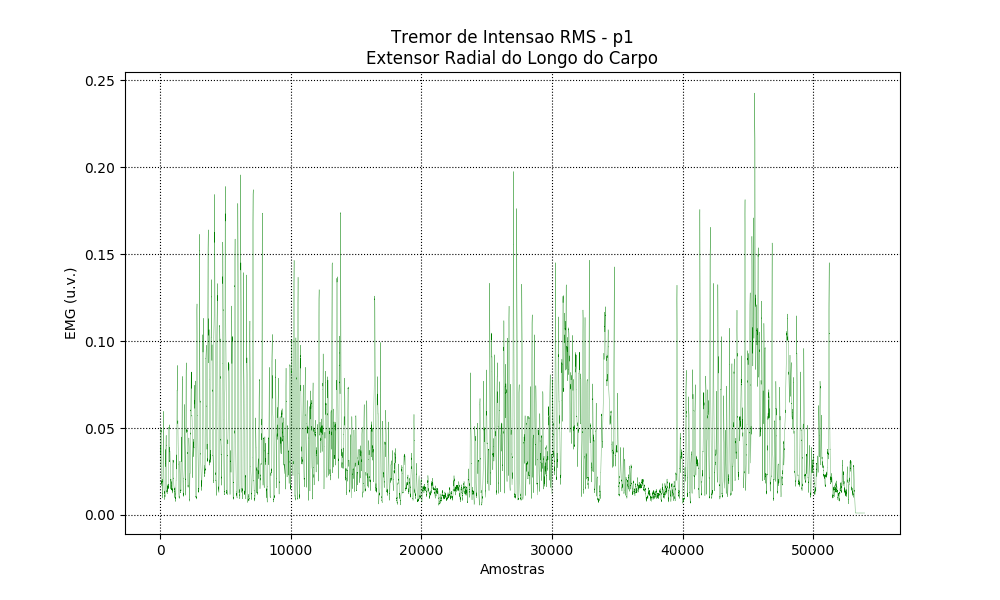

<IPython.core.display.Javascript object>


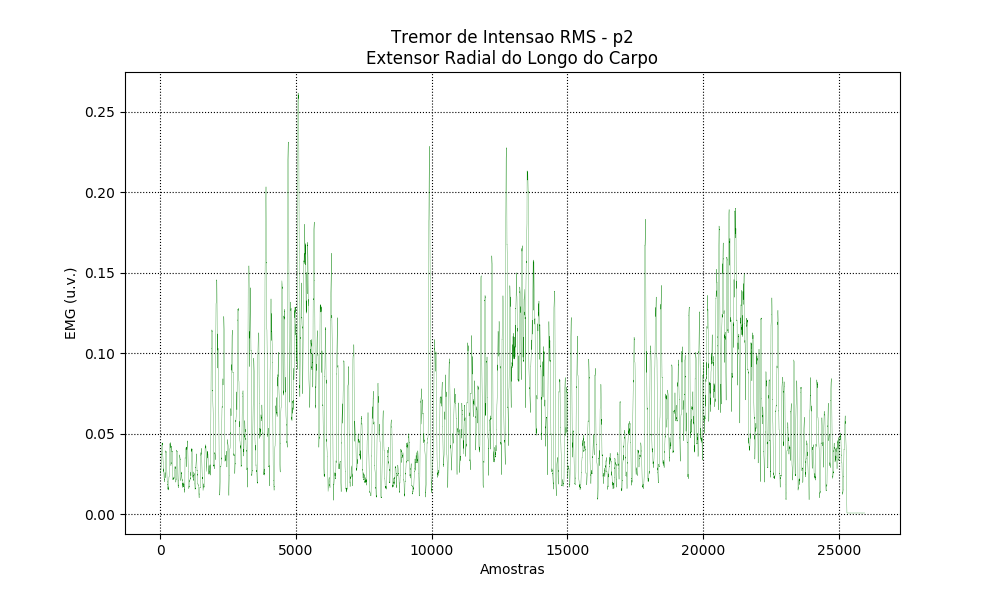

<IPython.core.display.Javascript object>


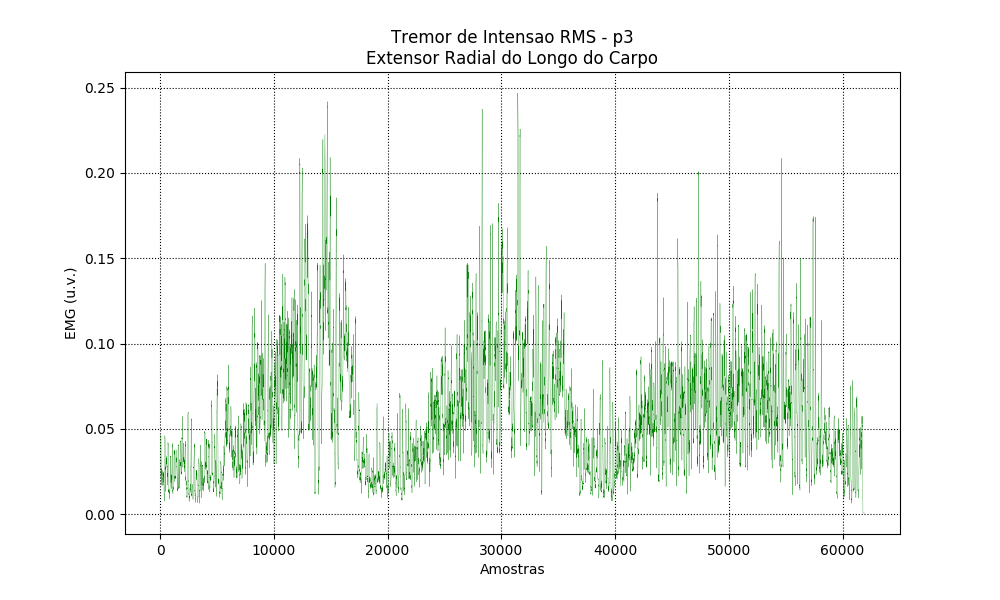

<IPython.core.display.Javascript object>


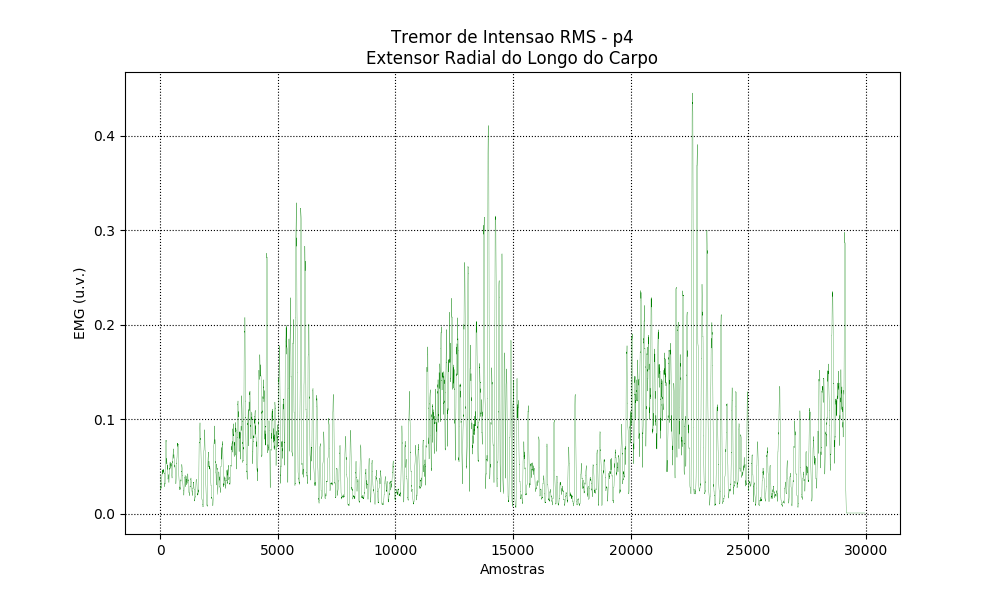

<IPython.core.display.Javascript object>


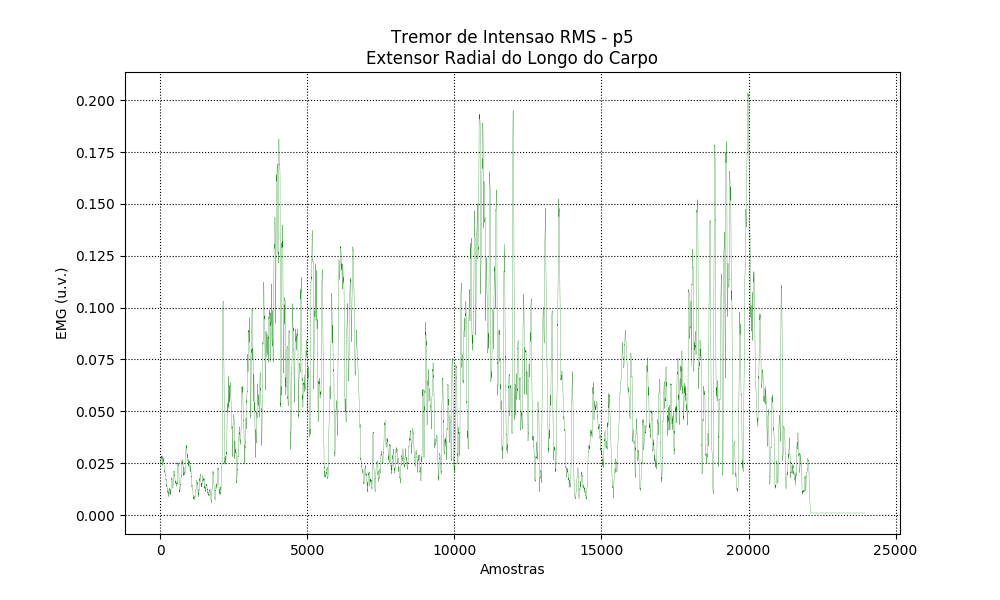

<IPython.core.display.Javascript object>


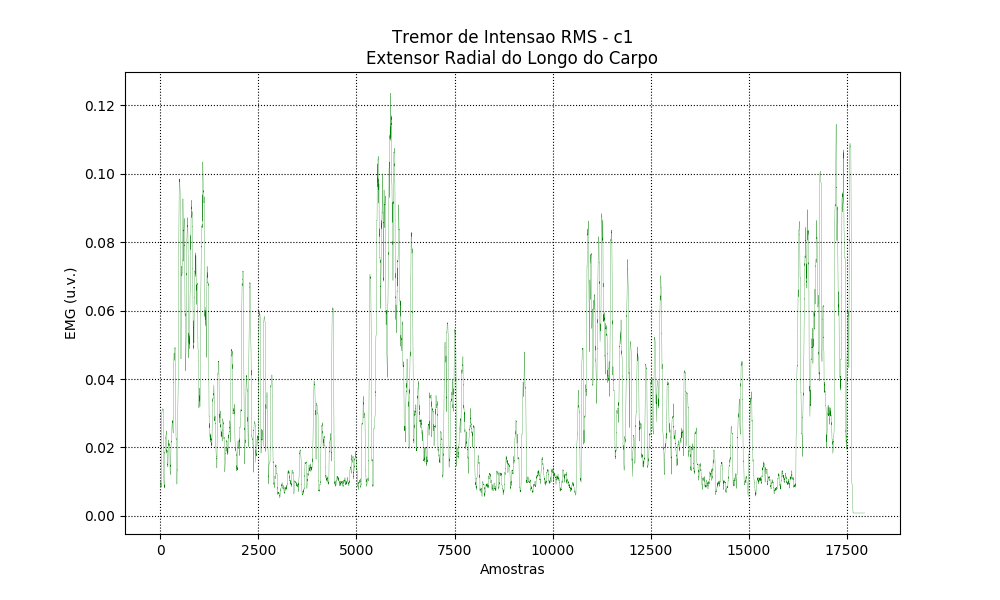

<IPython.core.display.Javascript object>


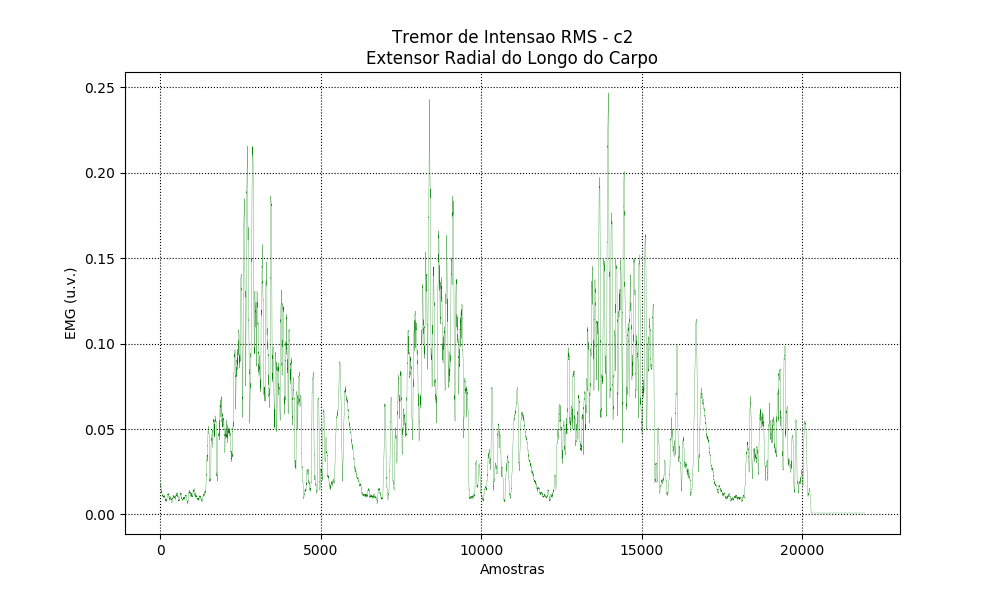

<IPython.core.display.Javascript object>


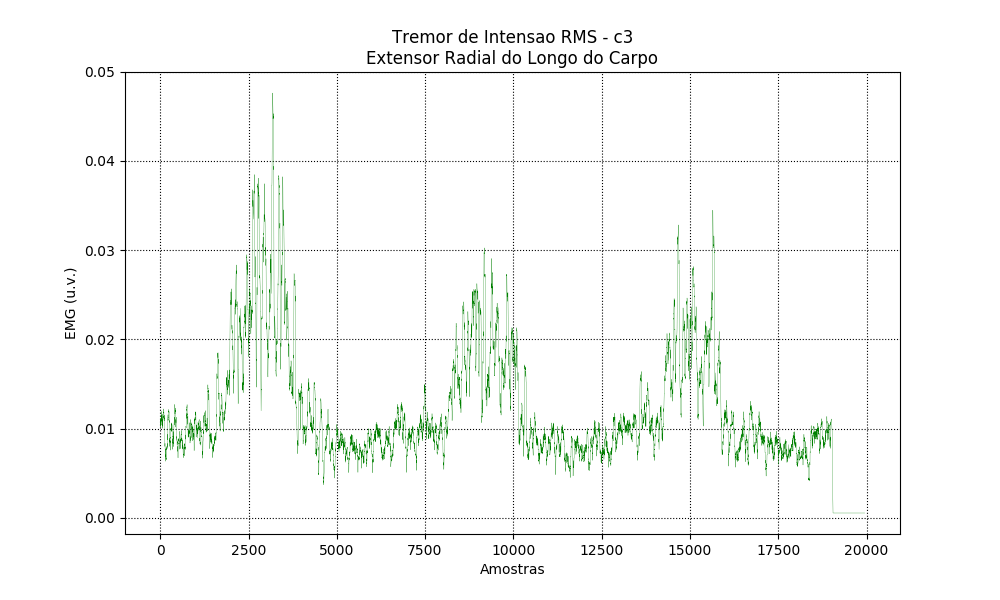

<IPython.core.display.Javascript object>


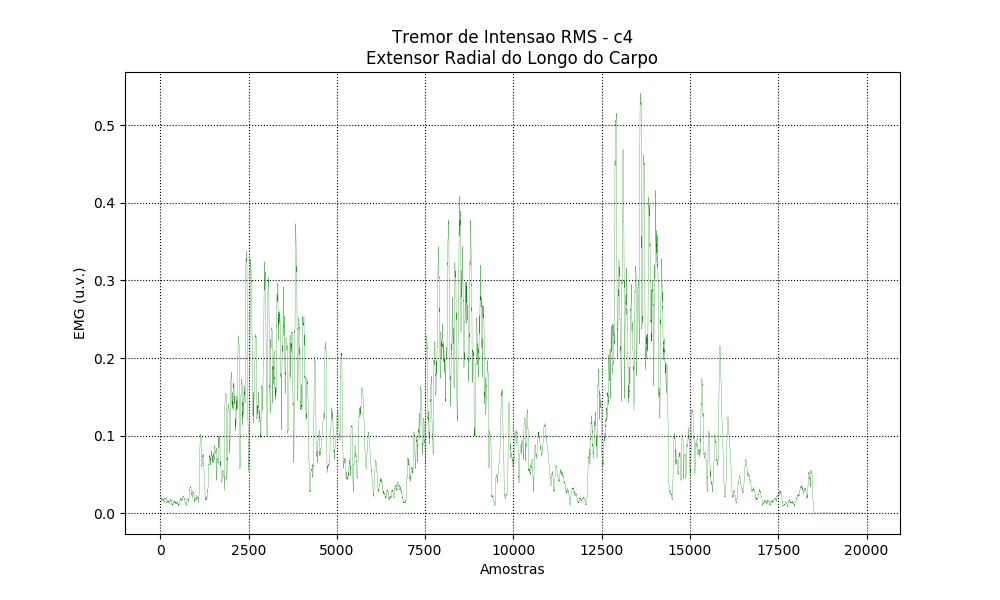

<IPython.core.display.Javascript object>


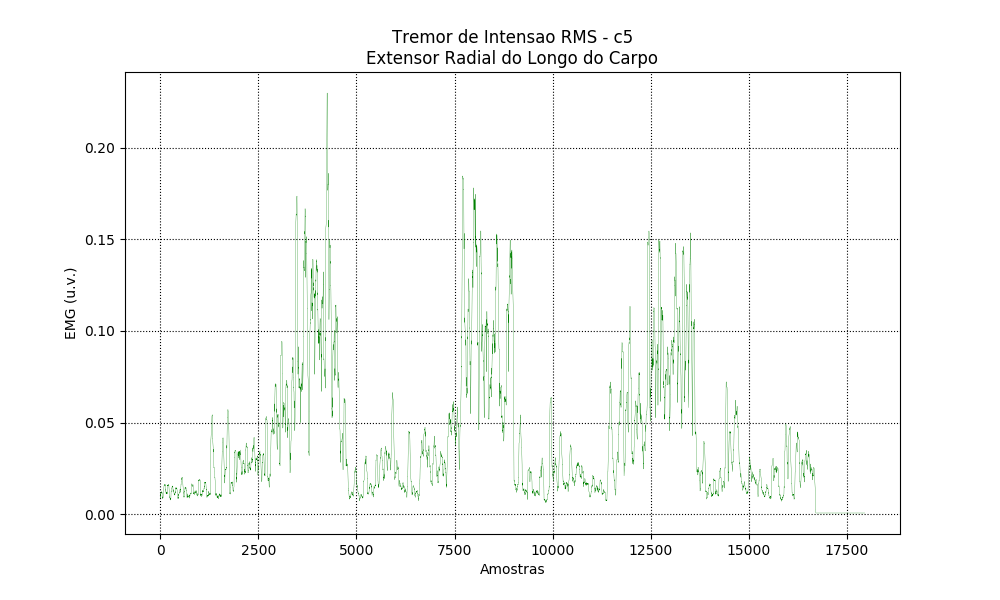

In [10]:
for i in files:
    plot_rms(i)

In [8]:
def rms(a, window_size):
        def subrms(a, window_size):
            a2 = np.power(a,2)
            window = np.ones(window_size)/float(window_size)
            return np.sqrt(np.convolve(a2, window, 'valid'))

        for i in range(a.shape[1]):
            if i == 0:
                Xc = subrms(a[:, i], window_size)
            else:
                Xcp = subrms(a[:, i], window_size)
                Xc = np.vstack((Xc,Xcp))
        return np.transpose(Xc)
    
file_name = pyedflib.EdfReader('DB_INTENC/p2.edf')
n = file_name.signals_in_file
signal_labels = file_name.getSignalLabels()
sigbufs = np.zeros((n, file_name.getNSamples()[0]))
for j in np.arange(n):
     sigbufs[j, :] = file_name.readSignal(j)

file_name._close()

df = pd.DataFrame(np.transpose(sigbufs))
df.insert(loc=0, column='Time', value=np.arange(0,len(df)*0.0005,0.0005))

df = df.rename(columns={0: 'Channel 1'})
df = df.rename(columns={1: 'Channel 2'})
df = df.rename(columns={2: 'Channel 3'})
df = df.rename(columns={3: 'Channel 4'})

dfa = df.as_matrix(columns=df.columns[2:3])
rms = rms(dfa,50)/norm

test = dfa/norm

<IPython.core.display.Javascript object>


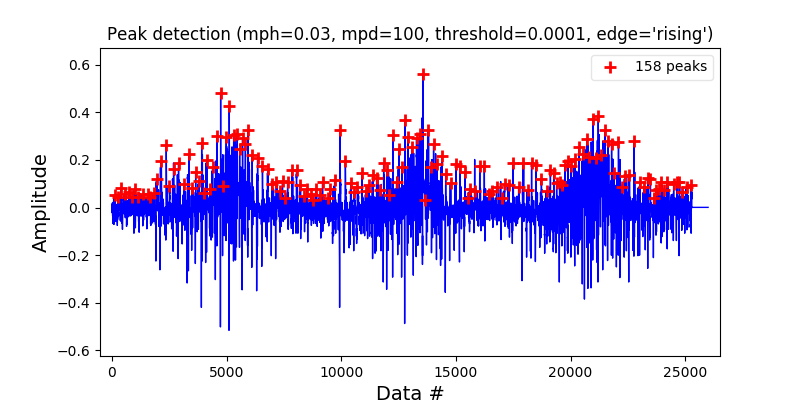

<IPython.core.display.Javascript object>


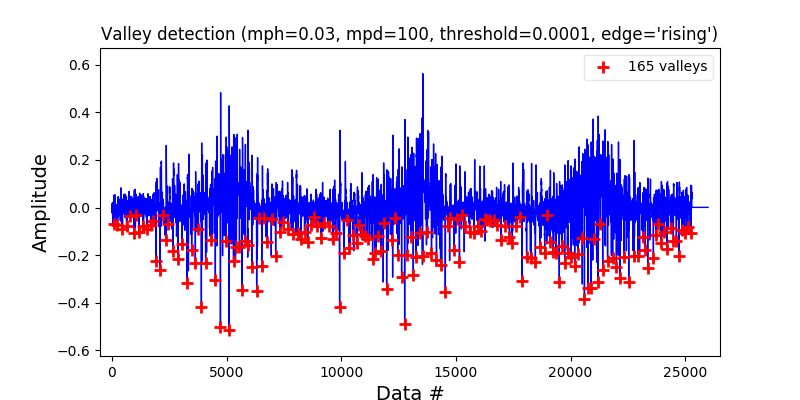

array([   87,   235,   459,   638,   801,   960,  1061,  1187,  1346,
        1525,  1697,  1803,  1919,  2094,  2220,  2349,  2453,  2668,
        2886,  3064,  3279,  3477,  3637,  3770,  3901,  4087,  4326,
        4510,  4732,  4975,  5106,  5303,  5428,  5563,  5678,  5814,
        5916,  6099,  6312,  6432,  6534,  6651,  6774,  6989,  7137,
        7329,  7469,  7686,  7892,  8110,  8232,  8400,  8539,  8699,
        8801,  8953,  9111,  9256,  9456,  9625,  9759,  9930, 10126,
       10236, 10345, 10517, 10672, 10786, 10892, 11021, 11151, 11368,
       11477, 11590, 11733, 11869, 11981, 12218, 12357, 12463, 12633,
       12766, 12886, 13035, 13143, 13268, 13431, 13549, 13758, 13937,
       14154, 14333, 14538, 14644, 14763, 14927, 15040, 15157, 15260,
       15379, 15596, 15790, 15970, 16094, 16251, 16369, 16472, 16646,
       16789, 16971, 17143, 17337, 17462, 17625, 17784, 17887, 18084,
       18274, 18467, 18657, 18872, 18975, 19096, 19249, 19360, 19511,
       19623, 19744,

In [300]:
detect_peaks(df['Channel 3']/norm, mph=0.03, mpd=100, threshold=0.0001, valley=False, show=True)
detect_peaks(df['Channel 3']/norm, mph=0.03, mpd=100, threshold=0.0001, valley=True, show=True)

In [212]:
20/norm

0.029171923175371522